In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
path = ('./datasets/colesterol.csv')

df_colesterol = pd.read_csv(path, index_col=False)
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,997.000000,997.000000,997.000000,1000.000000
mean,500.500000,49.206620,76.496690,174.889669,199.453260
std,288.819436,17.476704,21.439132,8.844703,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.700000,167.000000,166.345000
50%,500.500000,49.000000,75.500000,175.000000,199.455000
75%,750.250000,65.000000,90.200000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [108]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [109]:
df_colesterol['Nível de Atividade'].value_counts()

Nível de Atividade
Baixo       426
Moderado    298
Alto        272
Name: count, dtype: int64

In [110]:
df_colesterol.drop(columns='Id', inplace=True)

In [111]:
df_colesterol

,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
...,...,...,...,...,...,...,...
995,AB,Sim,Moderado,31.0,68.1,166.0,206.81
996,O,Não,Alto,51.0,47.7,170.0,128.03
997,AB,Não,Baixo,39.0,85.5,176.0,211.14
998,AB,Sim,Baixo,61.0,91.2,161.0,284.53


In [112]:
#df_colesterol.rename(columns={ 'Grupo Sanguíneo': 'grupo_sanguineo', 'Fumante': 'fumante', 'Nível de Atividade': 'nivel_de_atividade', 'Idade':'idade', 'Peso':'peso', 'Altura': 'altura', 'Colesterol':'colesterol'}, inplace=True)

In [113]:
df_colesterol.columns = ['grupo_sanguineo', 'fumante', 'nivel_atividade', 'idade', 'peso', 'altura', 'nivel_colesterol']

In [114]:
df_colesterol

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
...,...,...,...,...,...,...,...
995,AB,Sim,Moderado,31.0,68.1,166.0,206.81
996,O,Não,Alto,51.0,47.7,170.0,128.03
997,AB,Não,Baixo,39.0,85.5,176.0,211.14
998,AB,Sim,Baixo,61.0,91.2,161.0,284.53


In [115]:
df_colesterol_eda = df_colesterol.copy()
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [116]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [117]:
df_colesterol_eda.isna().sum()

grupo_sanguineo     4
fumante             3
nivel_atividade     4
idade               3
peso                3
altura              3
nivel_colesterol    0
dtype: int64

In [118]:
# Coletar Modas das variáveis

moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade.mode()


In [119]:
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [120]:
#Imputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [121]:
df_colesterol_eda.isna().sum()

grupo_sanguineo     0
fumante             0
nivel_atividade     0
idade               0
peso                0
altura              0
nivel_colesterol    0
dtype: int64

In [122]:
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)


In [123]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='nivel_colesterol'>

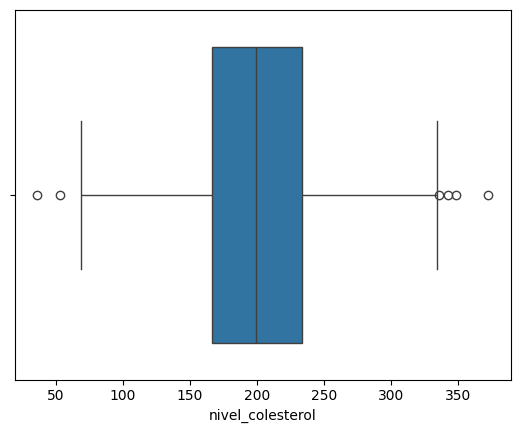

In [124]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

In [125]:
df_colesterol_eda[df_colesterol_eda.peso < 40]

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol
9,B,Sim,Alto,44,32.7,165,97.79
26,AB,Não,Alto,47,24.8,168,72.62
71,AB,Não,Alto,63,35.2,178,91.63
73,A,Não,Baixo,50,36.5,167,109.60
74,O,Sim,Moderado,43,34.5,161,111.93
79,O,Não,Moderado,45,38.1,161,120.96
87,O,Não,Alto,38,37.5,188,84.80
143,O,Não,Moderado,58,38.0,173,107.50
175,A,Não,Alto,28,37.2,166,108.82
267,A,Não,Moderado,72,36.8,165,112.05


In [126]:
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda.peso < 40].index, axis=0, inplace=True)

##### Cruzamento de variáveis categóricas com nível de colesterol

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

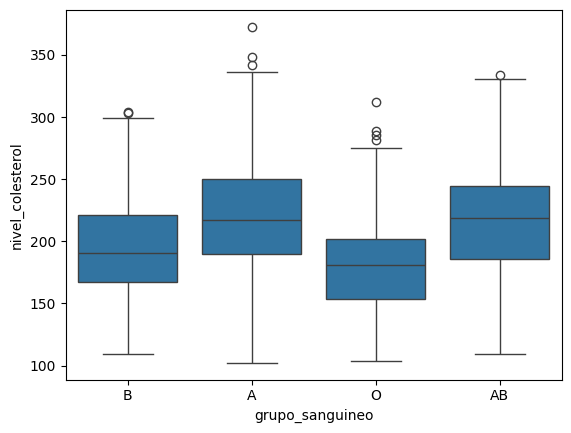

In [127]:
sns.boxplot(df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

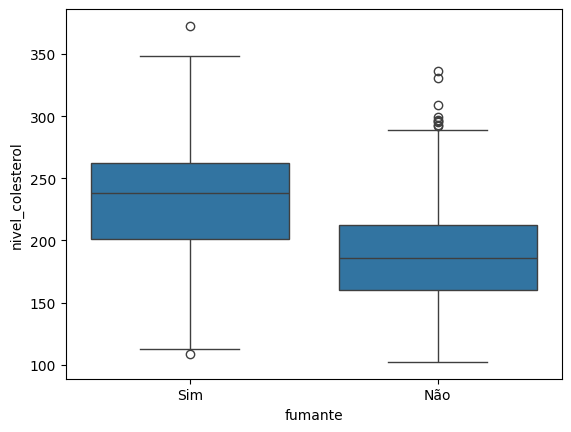

In [128]:
sns.boxplot(df_colesterol_eda, x='fumante', y='nivel_colesterol')


<Axes: xlabel='nivel_atividade', ylabel='nivel_colesterol'>

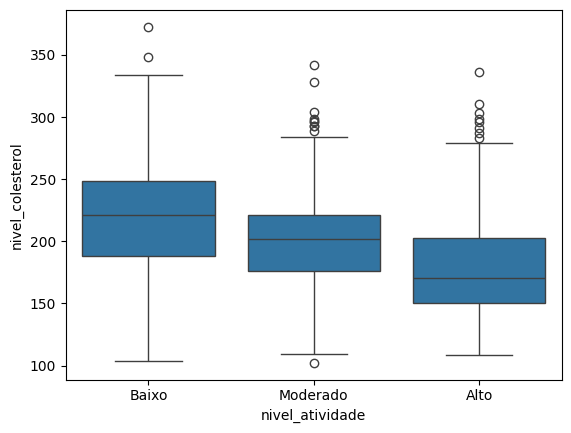

In [129]:
sns.boxplot(df_colesterol_eda, x='nivel_atividade', y='nivel_colesterol')


<Axes: xlabel='peso', ylabel='nivel_colesterol'>

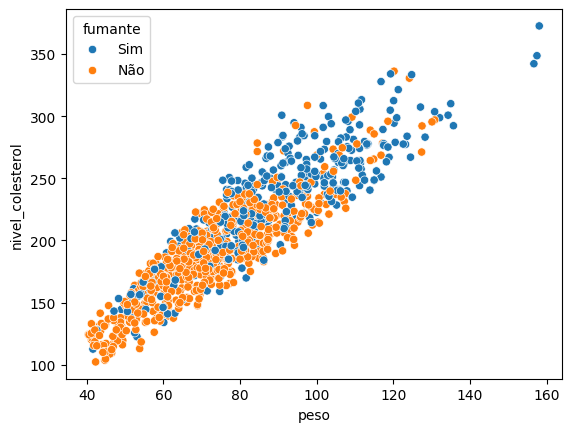

In [130]:
# Cruzamento variáveis numéricas com nível de colesterol
sns.scatterplot(df_colesterol_eda, x='peso', y='nivel_colesterol', hue='fumante')

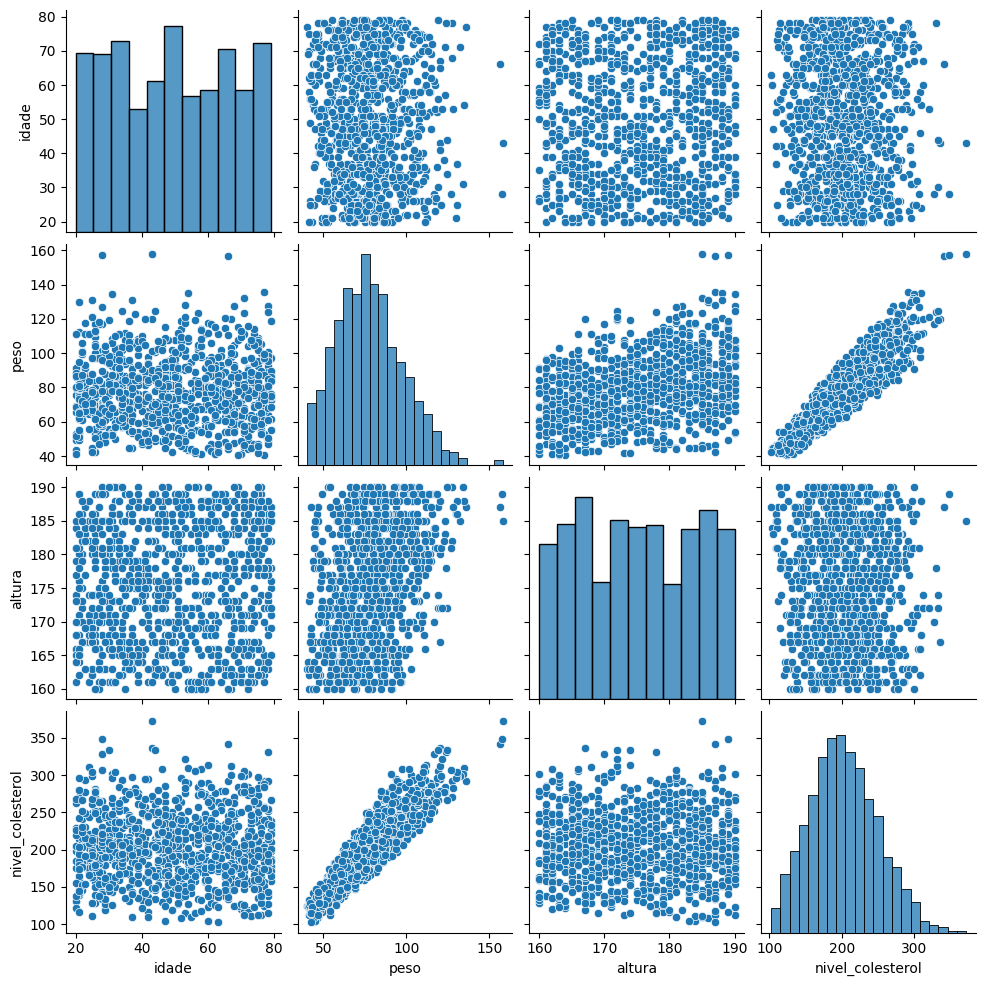

In [131]:
sns.pairplot(df_colesterol_eda)

In [132]:
df_colesterol_eda

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
...,...,...,...,...,...,...,...
995,AB,Sim,Moderado,31,68.1,166,206.81
996,O,Não,Alto,51,47.7,170,128.03
997,AB,Não,Baixo,39,85.5,176,211.14
998,AB,Sim,Baixo,61,91.2,161,284.53


In [133]:
# Converter variáveis categóricas em variáveis numéricas
# Usar get_dummies - One hot Encoder do pandas

df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype=int)

In [134]:
df_colesterol_eda

,nivel_atividade,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Moderado,31,68.1,166,206.81,0,1,0,0,0,1
996,Alto,51,47.7,170,128.03,0,0,0,1,1,0
997,Baixo,39,85.5,176,211.14,0,1,0,0,1,0
998,Baixo,61,91.2,161,284.53,0,1,0,0,0,1


In [135]:
# Converter variável categórica orginal em numero usando o factorize do pandas
df_colesterol_eda['nivel_atividade'] = pd.factorize(df_colesterol_eda.nivel_atividade)[0] + 1
df_colesterol_eda

,nivel_atividade,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,2,31,68.1,166,206.81,0,1,0,0,0,1
996,3,51,47.7,170,128.03,0,0,0,1,1,0
997,1,39,85.5,176,211.14,0,1,0,0,1,0
998,1,61,91.2,161,284.53,0,1,0,0,0,1


<Axes: >

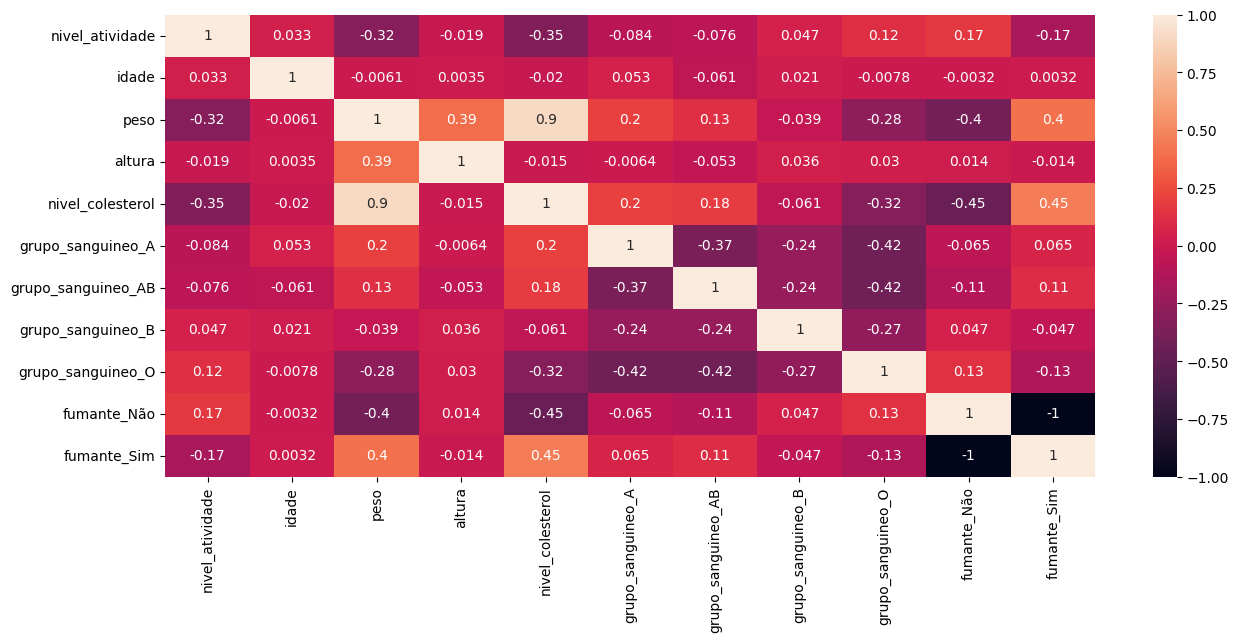

In [136]:
# mapa de calor com correlação
plt.figure(figsize=(15, 6))

sns.heatmap(df_colesterol_eda.corr(), annot=True)

<Axes: >

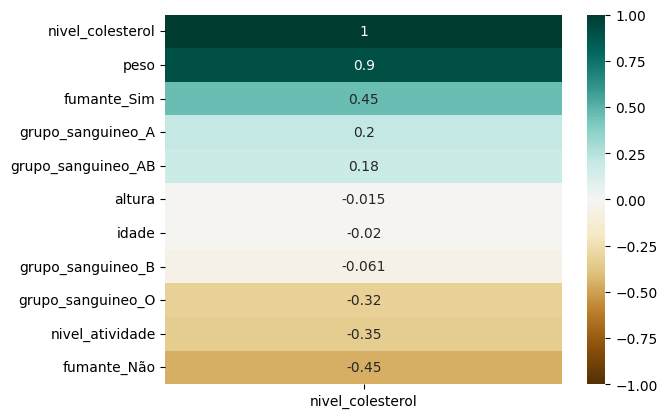

In [137]:
# Exibir em formato de ranking a correlação com a variável target - Nivel colesterol
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), annot=True, cmap='BrBG', vmin=-1, vmax=1)

In [138]:
# Bucketing de idade
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

df_colesterol_bucketing['escala_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], bins=bins_idade, labels=labels_idade, include_lowest=True)
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

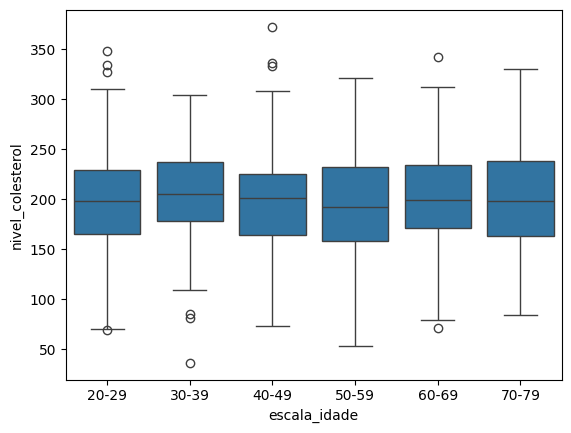

In [139]:
sns.boxplot(df_colesterol_bucketing, x='escala_idade', y='nivel_colesterol')

# Criar modelo

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [141]:
# Criar dataset de treino
df_colesterol.drop(df_colesterol[df_colesterol.peso < 40].index, axis=0, inplace=True)


In [142]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   grupo_sanguineo   960 non-null    object 
 1   fumante           960 non-null    object 
 2   nivel_atividade   959 non-null    object 
 3   idade             960 non-null    float64
 4   peso              960 non-null    float64
 5   altura            960 non-null    float64
 6   nivel_colesterol  963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [143]:
X = df_colesterol.drop(columns='nivel_colesterol')
y = df_colesterol['nivel_colesterol']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [145]:
# Pipeline
# Inputar moda nas variáveis categóricas - grupo_sanguineo, fumante, nivel_atividade
# Padronizar variáveis numéricas - idade, altura, peso
# One-Hot Encoding nas categóricas nominais - grupo sanguineo, fumante
# Ordinal Encoder nas variáveis categóricas ordinais - nivel_atividade
# inputar mediana nos ausentes numéricos - idade, altura, peso


# Nomes das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'altura', 'peso']
colunas_ordinais = ['nivel_atividade']

In [146]:
# Transformer categóricos
transformer_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))

])

In [147]:
# Transformer ordinais
transformer_ord = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))

])

In [148]:
# Transformer numerico
transformer_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [149]:
# Criar um columns transformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_num, colunas_numericas),
        ('cat', transformer_cat, colunas_categoricas),
        ('ord', transformer_ord, colunas_ordinais)
    ]
)

In [150]:
# Pipeline principal = Pre processamento + treinamento
model_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [151]:
# Treinar o modelo

model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'altura', 'peso']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade'])])),
                ('regressor', LinearRegression())])

# Análise de métricas


In [153]:
# gerar predição
y_pred = model_reg.predict(X_test)

In [154]:
#Calcular R2 Score
r2_score(y_test, y_pred)

0.9594250724093464